In [20]:
%load_ext autoreload
%autoreload 2
%run src/main.py --clustering-method 'metis'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
+-------------------+----------------------+
|     Parameter     |        Value         |
+===================+======================+
| Cluster number    | 10                   |
+-------------------+----------------------+
| Clustering method | metis                |
+-------------------+----------------------+
| Dropout           | 0.500                |
+-------------------+----------------------+
| Edge path         | ./input/edges.csv    |
+-------------------+----------------------+
| Epochs            | 50                   |
+-------------------+----------------------+
| Features path     | ./input/features.csv |
+-------------------+----------------------+
| Layers            | [16, 16, 16]         |
+-------------------+----------------------+
| Learning rate     | 0.010                |
+-------------------+----------------------+
| Seed              | 42                   |
+-----------

Train Loss: 1.004:   2%|▏         | 1/50 [00:00<00:09,  5.25it/s]

Training started.



Train Loss: 0.1149: 100%|██████████| 50/50 [00:25<00:00,  1.95it/s]



F-1 score: 0.8353


In [17]:
# M.Amintoosi
# nx.write_edgelist(nx.path_graph(4), "test.edgelist")
# G = nx.read_edgelist("test.edgelist")
type(G)

networkx.classes.graph.Graph

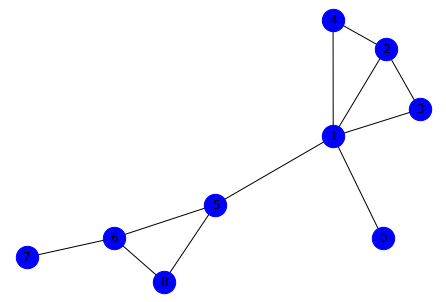

In [10]:
import networkx as nx
G=nx.Graph();
G=nx.read_edgelist("input/edges.txt") # edges.txt contains the edge list of your graph

# help to draw https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html
nx.draw(G,with_labels = True,node_color='b',node_size=500);

from node2vec import Node2Vec
# Generate walks
node2vec = Node2Vec(G, dimensions=2, walk_length=20, num_walks=10,workers=4)
# Learn embeddings 
model = node2vec.fit(window=10, min_count=1)
#model.wv.most_similar('1')
model.wv.save_word2vec_format("tmp/embedding.emb") #save the embedding in file embedding.emb

In [12]:
from sklearn.cluster import KMeans
import numpy as np


X = np.loadtxt("tmp/embedding.emb", skiprows=1) # load the embedding of the nodes of the graph
#print(X)
# sort the embedding based on node index in the first column in X
X=X[X[:,0].argsort()]; 
#print(X)
Z=X[0:X.shape[0],1:X.shape[1]]; # remove the node index from X and save in Z

kmeans = KMeans(n_clusters=2, random_state=0).fit(Z) # apply kmeans on Z
labels=kmeans.labels_  # get the cluster labels of the nodes.
print(labels)
print(np.where(labels==0))

[0 1 1 0 0 1 0 1 1]
[ True False False  True  True False  True False False]
